# 01 - Eliminating Outliers
This notebook presents how to eliminate the diagnosed outliers.

Some inital imports:

In [1]:
import pandas as pd
import numpy as np
% matplotlib inline
from matplotlib import pyplot as plt 

# Load the dataset that will be used

In [2]:
data = pd.read_csv('../data/data_with_problems.csv', index_col=0)
print('Our dataset has %d columns (features) and %d rows (people).' % (data.shape[1], data.shape[0]))
data.head(15)

Our dataset has 3 columns (features) and 200 rows (people).


,age,height,gender
CFLOXRHMDR,88.0,163.0,female
FXLJSNLSOG,29.0,158.0,female
FWDIVJKGOI,42.0,159.0,female
YWEBKQWHRE,25.0,179.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
SSZQEGTLNK,NaN,162.0,male
PRFEFXNGWN,36.0,166.0,female


Let us drop the missing and duplicated values since they don't matter for now (already covered in other notebooks):

In [3]:
data = data.drop_duplicates()
data = data.dropna()
print('Our dataset has %d columns (features) and %d rows (people).' % (data.shape[1], data.shape[0]))

Our dataset has 3 columns (features) and 173 rows (people).


# Dealing with outliers
Time to deal with the issues previously found.


## 1) Delete observations - use feature bounds
The easiest way is to delete the observations (for when you know the bounds of your features). Let's use **`Age`**, since know the limits. Set the limits:

In [4]:
min_age = 0
max_age = 117 # oldest person currently alive

Create the mask:

In [5]:
mask_age = (data['age'] >= min_age) & (data['age'] <= max_age)
mask_age.head(10)

CFLOXRHMDR    True
FXLJSNLSOG    True
FWDIVJKGOI    True
YWEBKQWHRE    True
YPUQAPSOYJ    True
PRFEFXNGWN    True
IIVXDNOAIV    True
VVQYVNRAGQ    True
YVEDWPTEEB    True
LGPQPJXWPI    True
Name: age, dtype: bool

Check if some **outliers** were *caught*:

In [6]:
data[~mask_age]

,age,height,gender
TSHRBGFOJU,300000000.0,184.0,female
SQYVEHAWSW,224.0,166.0,male


Yes! Two were found! The `mask_age` variable contains the rows we want to **keep**, i.e., the rows that meet the bounds above. So, lets drop the above 2 rows:

In [7]:
data = data[mask_age]
print('Our dataset has %d columns (features) and %d rows (people).' % (data.shape[1], data.shape[0]))

Our dataset has 3 columns (features) and 171 rows (people).


## 2) Create classes/bins
Instead of having a range of values you can discretize in classes/bins. Make use of pandas' [**`qcut`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html): Discretize variable into equal-sized buckets. 

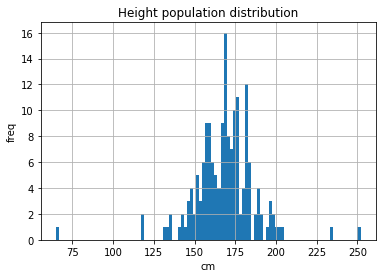

In [8]:
data['height'].hist(bins=100)
plt.title('Height population distribution')
plt.xlabel('cm')
plt.ylabel('freq')
plt.show()

Discretize!

In [9]:
height_bins = pd.qcut(data['height'], 
                      5, 
                      labels=['very short', 'short', 'average', 'tall', 'very tall'], 
                      retbins=True)

In [10]:
height_bins[0].head(10)

CFLOXRHMDR         short
FXLJSNLSOG         short
FWDIVJKGOI         short
YWEBKQWHRE          tall
YPUQAPSOYJ       average
PRFEFXNGWN         short
IIVXDNOAIV         short
VVQYVNRAGQ    very short
YVEDWPTEEB    very short
LGPQPJXWPI       average
Name: height, dtype: category
Categories (5, object): [very short < short < average < tall < very tall]

The limits of the defined classes/bins are:

In [11]:
height_bins[1]

array([  65.,  157.,  166.,  172.,  181.,  252.])

We could replace the height values by the new five categories. **Nevertheless, looks like a person with 252 cm is actually an outlier** and the best would be to evaluate this value against two-standard deviations or percentile (e.g., 99%).  

Lets define the height bounds according to two-standard deviations from the mean.

## 3) Delete observations - use the standard deviation

In [12]:
# Calculate the mean and standard deviation
std_height = data['height'].std()
mean_height = data['height'].mean()
# The mask!
mask_height = (data['height'] > mean_height-2*std_height) & (data['height'] < mean_height+2*std_height)
print('Height bounds:')
print('> Minimum accepted height: %3.1f' % (mean_height-2*std_height))
print('> Maximum accepted height: %3.1f' % (mean_height+2*std_height))

Height bounds:
> Minimum accepted height: 130.6
> Maximum accepted height: 206.2


Which ones are **out of the bounds**?

In [13]:
data.loc[~mask_height]

,age,height,gender
ZUMSOSOZUX,21.0,252.0,female
QMAARXTCCQ,26.0,65.0,female
XTGTMAUIMJ,49.0,235.0,female
VYIYVAVHOY,25.0,119.0,female
RPXMEBIHPC,32.0,119.0,male


**Let's delete** these rows (`mask_height` contains the rows we want to **keep**)

In [14]:
data = data[mask_height]
print('Our dataset has %d columns (features) and %d rows (people).' % (data.shape[1], data.shape[0]))

Our dataset has 3 columns (features) and 166 rows (people).


#### Done! So, our **initial dataset with 200 rows** (173 rows after dropping duplicates and missing values), **ended up with 166 rows** after this data handling.